In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [51]:
## Conveniences

def report(name, results):
    return '{}: {} ({})'.format(name, results.mean(), results.std())

# EDA

In [3]:
import pandas as pd

train = pd.read_csv('train.csv')
train.reset_index(drop=True, inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Convenience
columns = train.columns
dtypes = train.dtypes

print('COLUMNS')
for col, dtype in zip(columns, dtypes):
    print('- {} ({})'.format(col, dtype))

COLUMNS
- PassengerId (int64)
- Survived (int64)
- Pclass (int64)
- Name (object)
- Sex (object)
- Age (float64)
- SibSp (int64)
- Parch (int64)
- Ticket (object)
- Fare (float64)
- Cabin (object)
- Embarked (object)


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
survivors = sum(train['Survived'] == True)
print(survivors)

342


## Pairwise Correlation

In [7]:
correlations = train.corr()

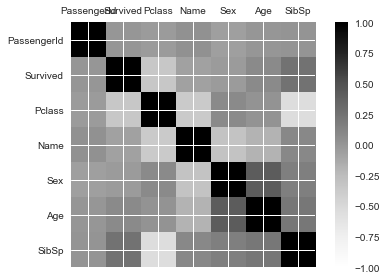

In [8]:
fig, ax = plt.subplots()
cax = ax.matshow(correlations, vmin=-1, vmax=1)

fig.colorbar(cax)
ticks = np.arange(0, 7, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

plt.tight_layout()

In [9]:
## TODO: Survival against Age, Sex, PClass....E.g., groupby exercises

## Spot-Checking Classification Algorithms

### Sanitation

In [10]:
## Check for NaNs in each series
for index, (label, series) in enumerate(train.iteritems()):
    print('Series {} ({}) contains {} NaN values.'.format(label, index, sum(pd.isnull(series))))

Series PassengerId (0) contains 0 NaN values.
Series Survived (1) contains 0 NaN values.
Series Pclass (2) contains 0 NaN values.
Series Name (3) contains 0 NaN values.
Series Sex (4) contains 0 NaN values.
Series Age (5) contains 177 NaN values.
Series SibSp (6) contains 0 NaN values.
Series Parch (7) contains 0 NaN values.
Series Ticket (8) contains 0 NaN values.
Series Fare (9) contains 0 NaN values.
Series Cabin (10) contains 687 NaN values.
Series Embarked (11) contains 2 NaN values.


In [11]:
## Do some research on Cabin: https://www.kaggle.com/c/titanic/discussion/4693
## Let's drop it, for expedience's sake.
modified_train = train.drop(train[[0, 3, 8, 10]], axis=1)

In [12]:
%%capture
## Replace NaNs in 'Embarked' with most common values (quick 'n' dirty)
modified_train['Embarked'].fillna(modified_train['Embarked'].value_counts().idxmax(), inplace=True)

In [13]:
## Replace NaNs in 'Age' w/ median age
modified_train['Age'].fillna(modified_train['Age'].median(), inplace=True)

In [14]:
## ...Just double-checkin'
for index, (label, series) in enumerate(modified_train.iteritems()):
    print('Series {} ({}) contains {} NaN values.'.format(label, index, sum(pd.isnull(series))))

Series Survived (0) contains 0 NaN values.
Series Pclass (1) contains 0 NaN values.
Series Sex (2) contains 0 NaN values.
Series Age (3) contains 0 NaN values.
Series SibSp (4) contains 0 NaN values.
Series Parch (5) contains 0 NaN values.
Series Fare (6) contains 0 NaN values.
Series Embarked (7) contains 0 NaN values.


### Binarize `Sex` and `Embarked`

In [15]:
sex_embarked_dummies = pd.get_dummies(modified_train[['Sex', 'Embarked']]).astype(int)
sex_embarked_dummies.tail(3)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
888,1,0,0,0,1
889,0,1,1,0,0
890,0,1,0,1,0


In [16]:
modified_train = modified_train.join(sex_embarked_dummies)

In [17]:
modified_train.drop(['Sex', 'Embarked', 'Sex_male'], axis=1, inplace=True)

In [18]:
modified_train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1


In [19]:
modified_train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1


In [20]:
for i, label in enumerate(modified_train.columns):
    print(i, label)

0 Survived
1 Pclass
2 Age
3 SibSp
4 Parch
5 Fare
6 Sex_female
7 Embarked_C
8 Embarked_Q
9 Embarked_S


In [29]:
from sklearn.model_selection import cross_val_score, KFold

## TODO: Train w/ folds from 0, 20 w/ 2-step, create violinplots of means/variances
## KFold parameters
folds = 10
random_state = 7

kfold = KFold(n_splits=folds, random_state=random_state)

In [30]:
X = modified_train.values[:, 1:]
Y = modified_train.values[:, 0]

### Linear Models

In [31]:
## Select Linear Models
## N.b., LDA assumes normality, and our data most certainly suffers from multicollinearity (cf. the 'Embarked_*' columns), so LR 
## is a more reasonable choice.
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [32]:
## Initialize
logreg = LogisticRegression()
lda = LinearDiscriminantAnalysis()

In [33]:
%%capture

#@ Train
logreg_results = cross_val_score(logreg, X, Y, cv=kfold)
lda_results = cross_val_score(lda, X, Y, cv=kfold)

In [34]:
## Results
for result in [logreg_results, lda_results]:
    print(report(result))

LR: 0.7946441947565543 (0.029915717149335067)
LR: 0.7901373283395755 (0.03545414179637112)


### Nonlinear Models

In [50]:
## Nonlinear Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier()
nb = GaussianNB()
cart = DecisionTreeClassifier()
svc = SVC()

models = [('KNN', knn), ('NB', nb), ('CART', cart), ('SVC', svc)]

In [55]:
## Train
for model_pair in models:
    name, model = model_pair
    results = cross_val_score(model, X, Y, cv=kfold)
    print(report(name, results))

KNN: 0.6993258426966292 (0.05439687790412654)
NB: 0.7879275905118602 (0.02215028896829326)
CART: 0.7800873907615481 (0.03543682790799482)
SVC: 0.6982022471910112 (0.06682928447527202)
